 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sn

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv")

whale_returns_dataframe = pd.read_csv(whale_returns_data, index_col = "Date", parse_dates=True, infer_datetime_format=True )

whale_returns_dataframe.head(15)



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [3]:
# Count nulls

whale_returns_dataframe.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_dataframe.dropna(inplace=True)
whale_returns_dataframe.isnull().sum()



SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

# Algorithmic Daily Returns



In [5]:
# Reading algorithmic returns
algo_returns_data = Path("Resources/algo_returns.csv")

algo_returns_dataframe = pd.read_csv(algo_returns_data, index_col = "Date", parse_dates=True, infer_datetime_format=True)

algo_returns_dataframe.sort_index(ascending = True, inplace = True)

algo_returns_dataframe.head(100)


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [6]:
# Count nulls
algo_returns_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_dataframe.dropna(inplace = True)

algo_returns_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = Path("Resources/sp_tsx_history.csv")

sp_tsx_dataframe = pd.read_csv(sp_tsx_history, index_col="Date", parse_dates=True, infer_datetime_format=True)

sp_tsx_dataframe.head(15)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [9]:
# Check Data Types
sp_tsx_dataframe.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types
sp_tsx_dataframe["Close"] = sp_tsx_dataframe["Close"].str.replace("$", "")
sp_tsx_dataframe["Close"] = sp_tsx_dataframe["Close"].str.replace(",", "")


sp_tsx_dataframe["Close"].dtype

dtype('O')

In [11]:
sp_tsx_dataframe["Close"] = sp_tsx_dataframe["Close"].astype('float')
sp_tsx_dataframe["Close"].dtype

dtype('float64')

In [12]:
# Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_dataframe.pct_change() 
sp_tsx_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [13]:
# Drop nulls
sp_tsx_daily_returns.dropna(inplace = True)
sp_tsx_daily_returns.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [14]:
sp_tsx_daily_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_daily_returns.columns = ['SP_TSX']
sp_tsx_daily_returns

,SP_TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
Combined_Returns_Dataframe = pd.concat([whale_returns_dataframe, algo_returns_dataframe, sp_tsx_daily_returns], axis = 'columns', join = 'inner')
Combined_Returns_Dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

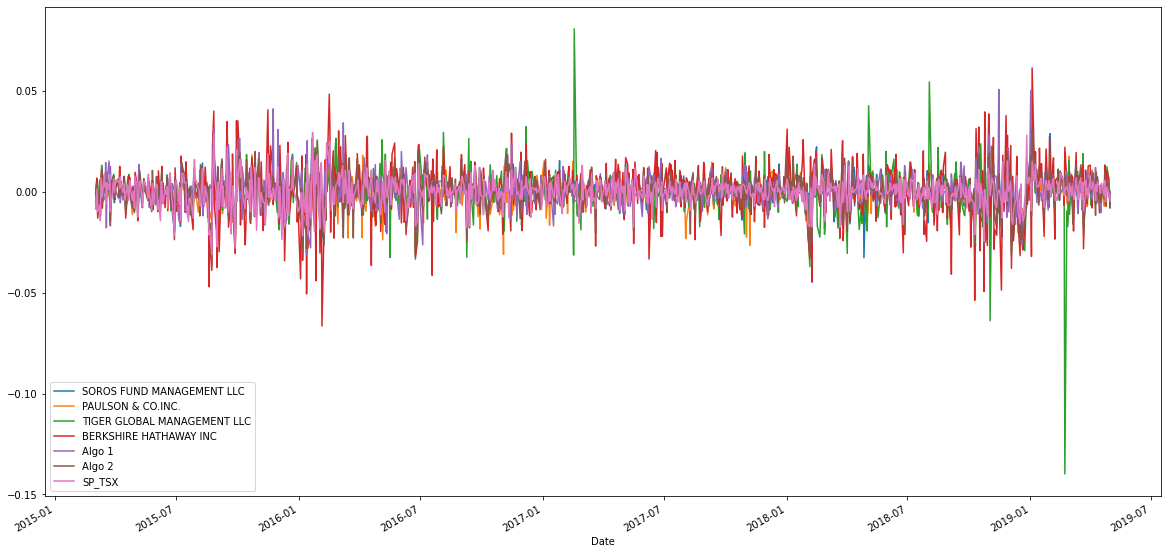

In [17]:
# Plot daily returns of all portfolios
Combined_Returns_Dataframe.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

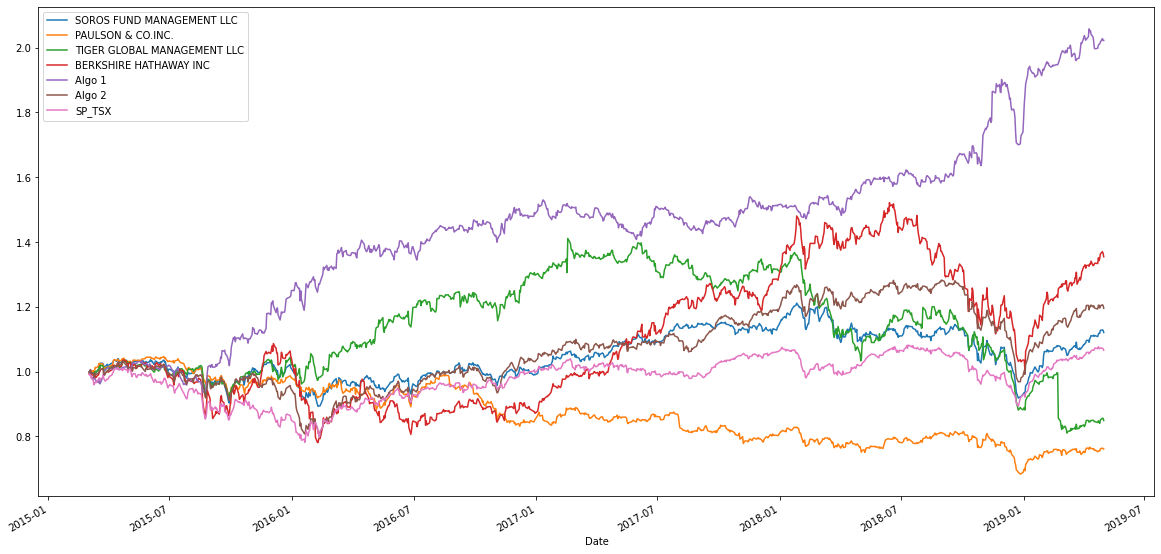

In [18]:
# Calculate cumulative returns of all portfolios
Cumulative_Returns = (1+ Combined_Returns_Dataframe).cumprod()
# Plot cumulative returns
Cumulative_Returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P TSX 60
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


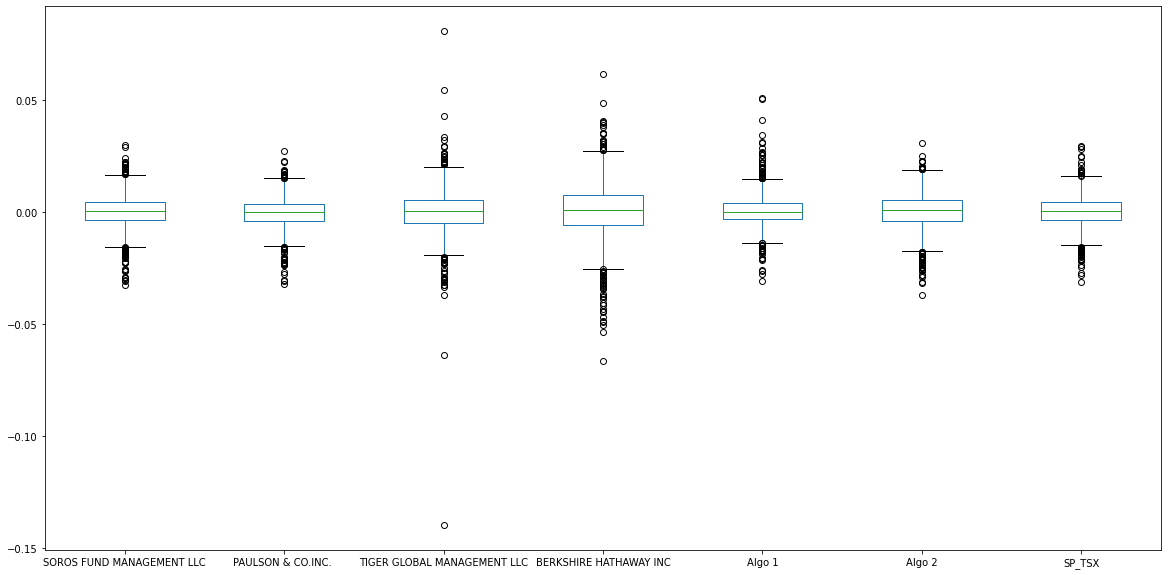

In [19]:
# Box plot to visually show risk
Combined_Returns_Dataframe.plot(kind = 'box', legend = True, figsize = (20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
df_daily_std = pd.DataFrame(Combined_Returns_Dataframe.std()).rename(columns = {0: "Standard_Deviation"})
df_daily_std.index.name = "Fund_Name"
df_daily_std


,Standard_Deviation
Fund_Name,
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
SP_TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60
df_daily_std["Standard_Deviation"] = df_daily_std["Standard_Deviation"].astype('float')

df_daily_std["Standard_Deviation"].dtype

Risk_Analysis = df_daily_std[df_daily_std["Standard_Deviation"] > df_daily_std.loc["SP_TSX", "Standard_Deviation"]]

print(Risk_Analysis)
             
print("All Funds within this dataframe have more risk than the S&P TSX 60")




                             Standard_Deviation
Fund_Name                                      
SOROS FUND MANAGEMENT LLC              0.007828
TIGER GLOBAL MANAGEMENT LLC            0.010883
BERKSHIRE HATHAWAY INC                 0.012826
Algo 1                                 0.007589
Algo 2                                 0.008326
All Funds within this dataframe have more risk than the S&P TSX 60


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
Annualized_Standard_Deviation = df_daily_std*np.sqrt(252)

Annualized_Standard_Deviation = pd.DataFrame(Annualized_Standard_Deviation['Standard_Deviation'])


Annualized_Standard_Deviation

,Standard_Deviation
Fund_Name,
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
SP_TSX,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60
3. Calculate and plot a 60-day Beta for Berkshire Hathaway Inc compared to the S&P 60 TSX

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Rolling_Standard_Deviation = Combined_Returns_Dataframe.rolling(window = 21).std()

Rolling_Standard_Deviation_Dataframe = pd.DataFrame(Rolling_Standard_Deviation)

Rolling_Standard_Deviation_Dataframe

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


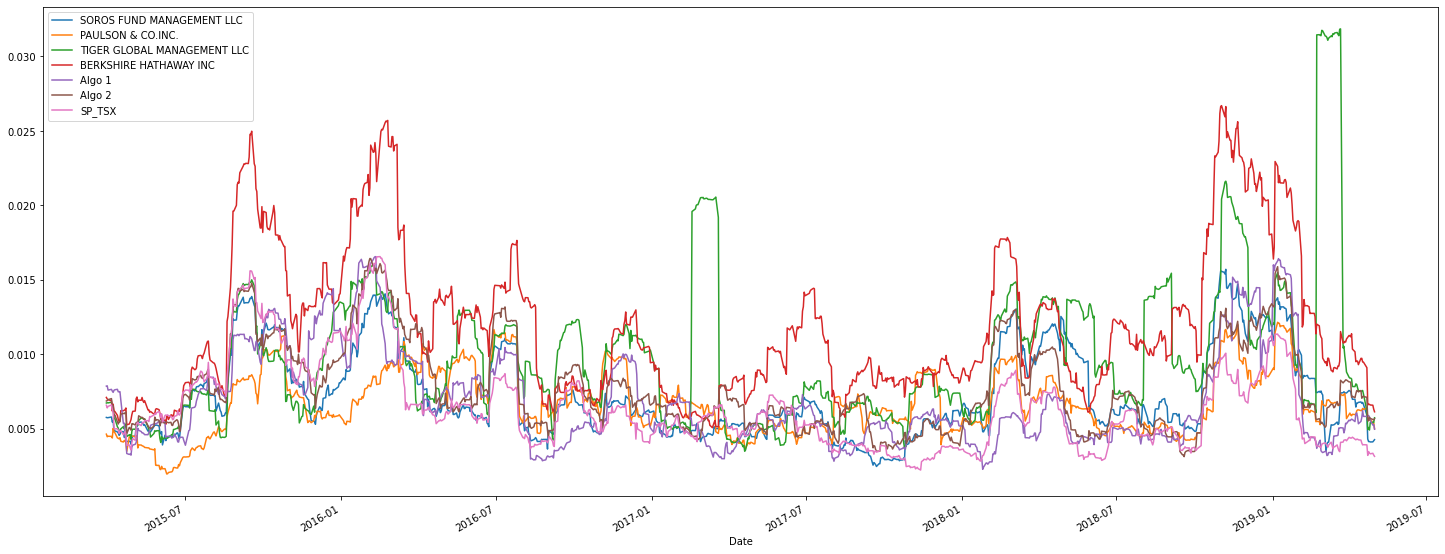

In [24]:
# Plot the rolling standard deviation
Rolling_Standard_Deviation.plot(figsize = (25,10))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
Correlation = pd.DataFrame(Combined_Returns_Dataframe.corr())



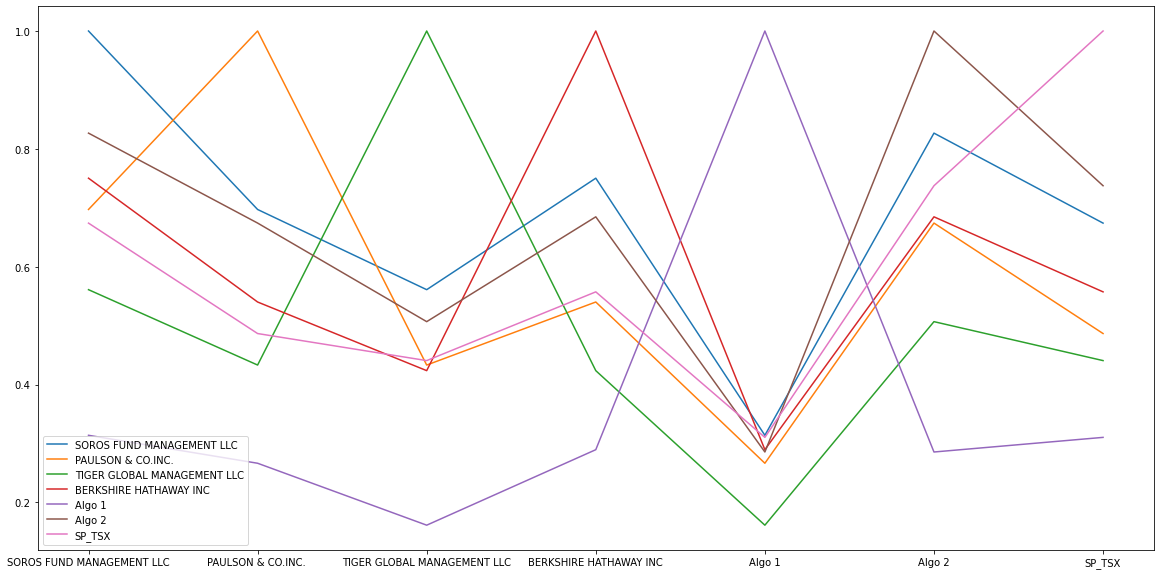

In [26]:
# Display de correlation matrix
Correlation.plot(figsize = (20,10))

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [67]:
# Calculate covariance of a single portfolio
Covariance_BerkshireHathaway = Combined_Returns_Dataframe['BERKSHIRE HATHAWAY INC'].cov(Combined_Returns_Dataframe['SP_TSX'])

print(f"The Covariance of Berkshire Hathaway compared to the S&P is {Covariance_BerkshireHathaway}")

# Calculate variance of S&P TSX
Variance_TSX = Combined_Returns_Dataframe['SP_TSX'].var()
print(f"The Variance of the S&P is {Variance_TSX}")

The Covariance of Berkshire Hathaway compared to the S&P is 5.027336077110027e-05
The Variance of the S&P is 4.9479515915131015e-05


In [84]:
# Computing beta
Rolling_Covariance = Combined_Returns_Dataframe['BERKSHIRE HATHAWAY INC'].rolling(window = 60).cov(Combined_Returns_Dataframe['SP_TSX'])
Rolling_Variance = Combined_Returns_Dataframe['SP_TSX'].rolling(window = 60).var()


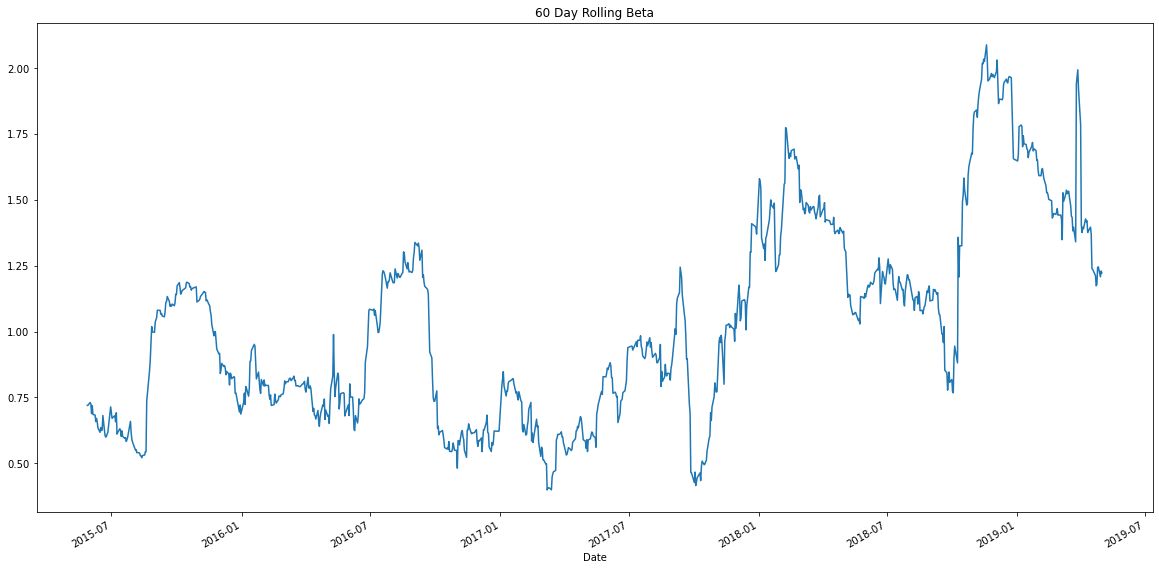

In [86]:
Rolling_Beta = Rolling_Covariance / Rolling_Variance

Rolling_Beta.plot(figsize = (20,10), title = "60 Day Rolling Beta")
# Plot beta trend

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

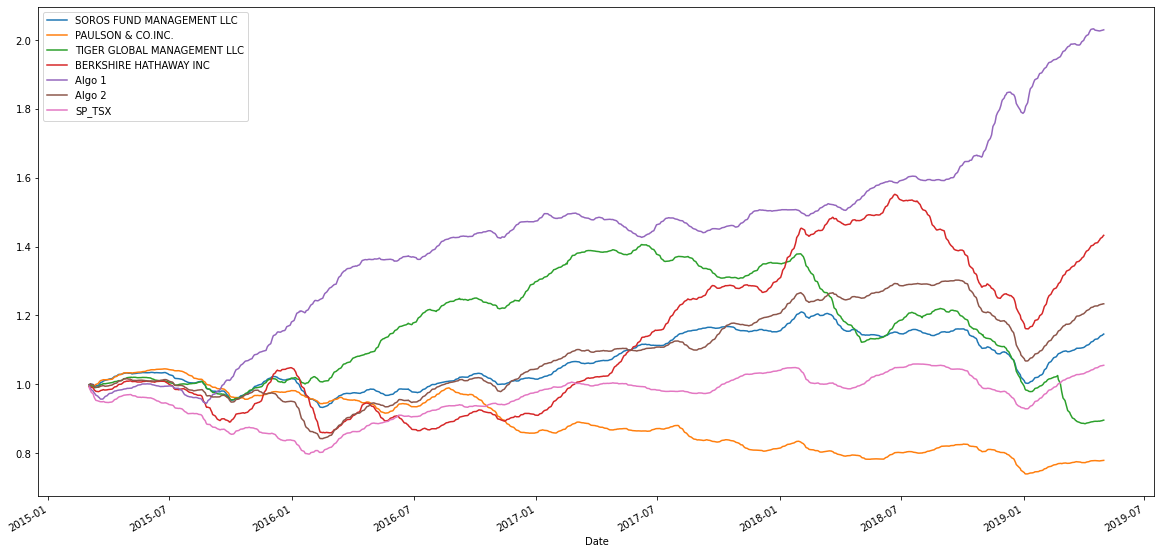

In [28]:
# Use `ewm` to calculate the rolling window
Exponential_Weighted_Average = Combined_Returns_Dataframe.ewm(span = 21).mean()
(1+Exponential_Weighted_Average).cumprod().plot(figsize = (20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [29]:
# Annualized Sharpe Ratios
Sharpe_Ratio = Combined_Returns_Dataframe.mean() / Combined_Returns_Dataframe.std()


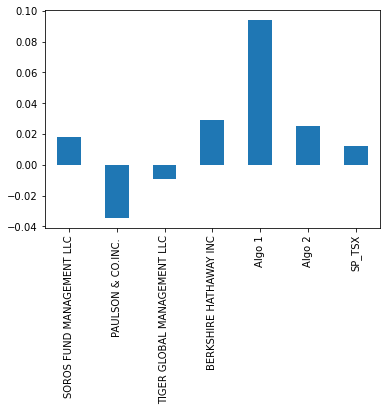

In [30]:
# Visualize the sharpe ratios as a bar plot
Sharpe_Ratio.plot(kind = 'bar')


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [31]:
# Reading data from 1st stock
Shopify = pd.read_csv(Path("Resources/shop_historical.csv"), parse_dates = True, index_col = "Date", infer_datetime_format = True)
Shopify.rename(columns = {"Close" : 'Shopify'}, inplace = True)

Shopify = Shopify.drop(['Symbol'], axis = 1)

Shopify

,Shopify
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51
...,...
2019-12-20,513.22
2019-12-23,511.62
2019-12-24,525.39


In [32]:
# Reading data from 2nd stock
Open_Text_Corporation = pd.read_csv(Path("Resources/otex_historical.csv"), index_col = "Date", parse_dates = True, infer_datetime_format = True)
Open_Text_Corporation.rename(columns = {'Close' : 'Open_Text_Corporation'}, inplace = True)
Open_Text_Corporation = Open_Text_Corporation.drop(['Symbol'], axis = 1)

Open_Text_Corporation


,Open_Text_Corporation
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16
...,...
2019-12-20,58.68
2019-12-23,57.89
2019-12-24,57.44


In [33]:
# Reading data from 3rd stock
Loblaw_Companies = pd.read_csv(Path("Resources/l_historical.csv"), parse_dates = True, index_col = "Date", infer_datetime_format = True)
Loblaw_Companies = Loblaw_Companies.rename(columns = {"Close" : "LobLaw Companies"})

Loblaw_Companies = Loblaw_Companies.drop(["Symbol"], axis = 1)
Loblaw_Companies

,LobLaw Companies
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86
...,...
2019-12-20,67.90
2019-12-23,67.68
2019-12-24,67.67


In [34]:
# Combine all stocks in a single DataFrame
Stock_Portfolio = pd.DataFrame(pd.concat((Shopify, Open_Text_Corporation, Loblaw_Companies), axis = 1, join = "inner"))
Stock_Portfolio.sort_index(ascending = True, inplace = True)
Stock_Portfolio

,Shopify,Open_Text_Corporation,LobLaw Companies
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [35]:
# Calculate daily returns
Stock_Portfolio_Returns = Stock_Portfolio.pct_change()
# Drop NAs
Stock_Portfolio.dropna(inplace = True)

# Display sample data

Stock_Portfolio_Returns

,Shopify,Open_Text_Corporation,LobLaw Companies
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547
2019-12-23,-0.003118,-0.013463,-0.003240
2019-12-24,0.026915,-0.007773,-0.000148


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
Weighted_Portfolio = Stock_Portfolio_Returns.dot(weights)
Weighted_Portfolio_Returns = Weighted_Portfolio.pct_change()
Weighted_Portfolio_Returns.dropna(inplace = True)


# Display sample data
Weighted_Portfolio_Returns = pd.DataFrame(Weighted_Portfolio_Returns)
Weighted_Portfolio_Returns = Weighted_Portfolio_Returns.rename(columns = {0:'Custom Portfolio'})
Weighted_Portfolio_Returns


,Custom Portfolio
Date,
2018-01-04,6.999117
2018-01-05,-1.692070
2018-01-08,-0.681011
2018-01-09,0.001405
2018-01-10,-1.528470
...,...
2019-12-20,-1.781975
2019-12-23,-1.881488
2019-12-24,-1.958271


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame
All_Portfolio_Returns = pd.concat((Weighted_Portfolio_Returns, Combined_Returns_Dataframe), axis = 1, join = 'inner')


All_Portfolio_Returns


,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2018-01-04,6.999117,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,-1.692070,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.681011,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,0.001405,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
2018-01-10,-1.528470,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368
...,...,...,...,...,...,...,...,...
2019-04-25,-1.413567,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.062949,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.018485,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [53]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
All_Portfolio_Returns.dropna(inplace = True)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized `std`
All_Portfolio_Standard_Deviation = pd.DataFrame(All_Portfolio_Returns.std())

All_Portfolio_Standard_Deviation = All_Portfolio_Standard_Deviation.rename(columns = {0:'Standard Deviation'})

All_Portfolio_Rolling_Standard_Deviation


,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Date,,,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-25,4.089807,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,4.114604,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,3.521407,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


### Calculate and plot rolling `std` with 21-day window

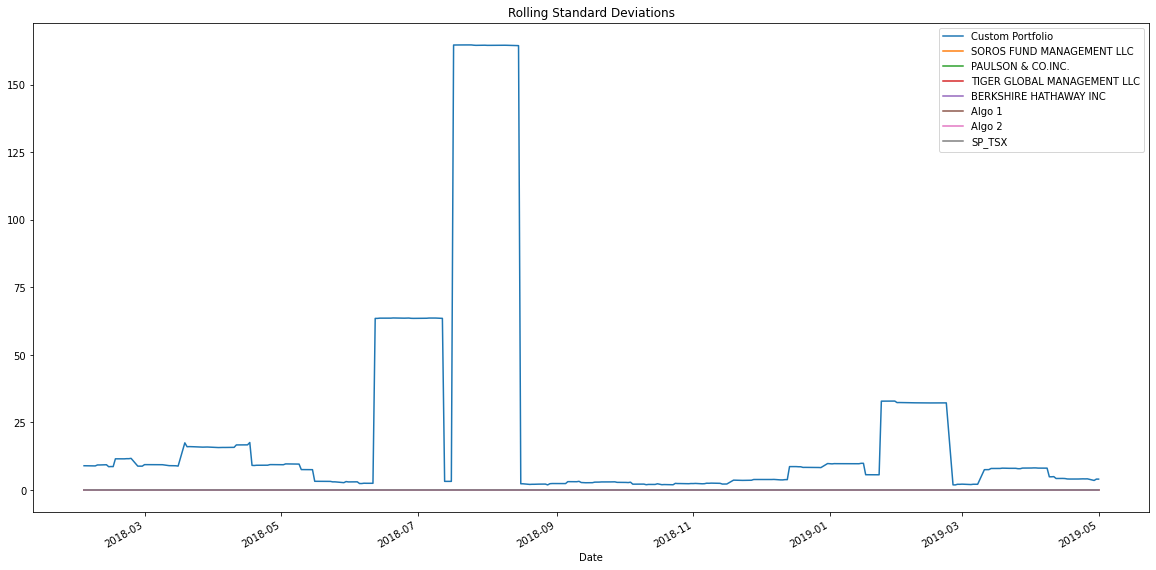

In [51]:
# Calculate rolling standard deviation
All_Portfolio_Rolling_Standard_Deviation = All_Portfolio_Returns.rolling(window = 21).std()

# Plot rolling standard deviation
All_Portfolio_Rolling_Standard_Deviation.plot(figsize = (20,10), title = "Rolling Standard Deviations")

### Calculate and plot the correlation

In [91]:
# Calculate and plot the correlation

Correlation_All = pd.DataFrame(All_Portfolio_Returns.corr())

Correlation_All

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_TSX
Custom Portfolio,1.000000,-0.003505,0.004131,-0.019872,0.004111,0.027093,-0.014915,-0.019074
SOROS FUND MANAGEMENT LLC,-0.003505,1.000000,0.764439,0.526603,0.782303,0.306049,0.834421,0.686392
PAULSON & CO.INC.,0.004131,0.764439,1.000000,0.536558,0.647520,0.320617,0.798499,0.624023
TIGER GLOBAL MANAGEMENT LLC,-0.019872,0.526603,0.536558,1.000000,0.384162,0.131035,0.485292,0.438635
BERKSHIRE HATHAWAY INC,0.004111,0.782303,0.647520,0.384162,1.000000,0.295068,0.783388,0.649616
Algo 1,0.027093,0.306049,0.320617,0.131035,0.295068,1.000000,0.322990,0.285411
Algo 2,-0.014915,0.834421,0.798499,0.485292,0.783388,0.322990,1.000000,0.754031
SP_TSX,-0.019074,0.686392,0.624023,0.438635,0.649616,0.285411,0.754031,1.000000


### Calculate and Plot Beta for Your Portfolio compared to the S&P 60 TSX

Date
2018-01-04           NaN
2018-01-05           NaN
2018-01-08           NaN
2018-01-09           NaN
2018-01-10           NaN
                 ...    
2019-04-25    -63.783367
2019-04-26    -61.501115
2019-04-29    -77.394102
2019-04-30    -93.912387
2019-05-01   -107.841608
Length: 327, dtype: float64


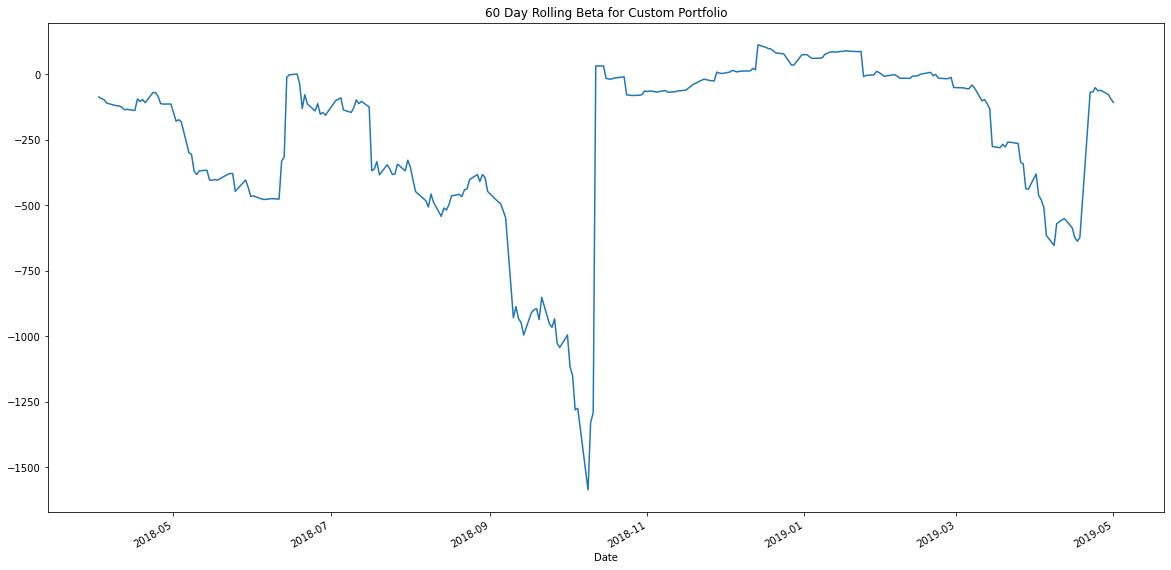

In [94]:
# Calculate and plot Beta
Rolling_Covariance2 = All_Portfolio_Returns['Custom Portfolio'].rolling(window = 60).cov(All_Portfolio_Returns['SP_TSX'])
Rolling_Variance2 = All_Portfolio_Returns['SP_TSX'].rolling(window = 60).var()

Rolling_Beta_2 = Rolling_Covariance2 / Rolling_Variance2

print(Rolling_Beta_2)

Rolling_Beta_2.plot(figsize = (20,10), title = '60 Day Rolling Beta for Custom Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [99]:
# Calculate Annualzied Sharpe Ratios
Annualized_Sharpe_Ratios = All_Portfolio_Returns.mean()*252 / All_Portfolio_Returns.std()*np.sqrt(252)

Annualized_Sharpe_Ratios = pd.DataFrame(Annualized_Sharpe_Ratios)

Annualized_Sharpe_Ratios = Annualized_Sharpe_Ratios.rename(columns = {0: 'Annualized Sharpe Ratios'})

Annualized_Sharpe_Ratios

,Annualized Sharpe Ratios
Custom Portfolio,-193.954931
SOROS FUND MANAGEMENT LLC,-28.470295
PAULSON & CO.INC.,-100.061123
TIGER GLOBAL MANAGEMENT LLC,-352.994689
BERKSHIRE HATHAWAY INC,44.614588
Algo 1,481.377795
Algo 2,-6.123682
SP_TSX,1.362433


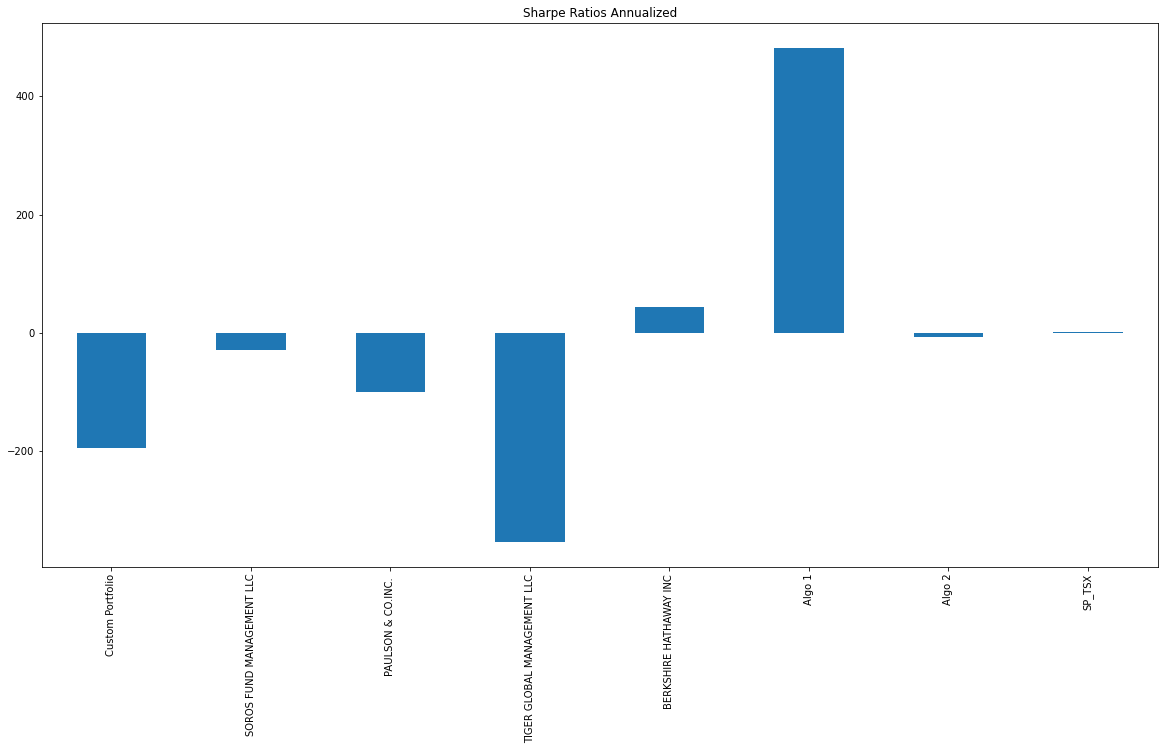

In [96]:
# Visualize the sharpe ratios as a bar plot
Annualized_Sharpe_Ratios.plot(kind = 'bar', figsize = (20,10), title = 'Sharpe Ratios Annualized')

### How does your portfolio do?

Write your answer here!